### Flight Price:

**Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?**

In [3]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('flight_price.xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Get the dimensions of the dataset
rows, columns = df.shape
print(f'The dataset has {rows} rows and {columns} columns.')


The dataset has 10683 rows and 11 columns.


**Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.**

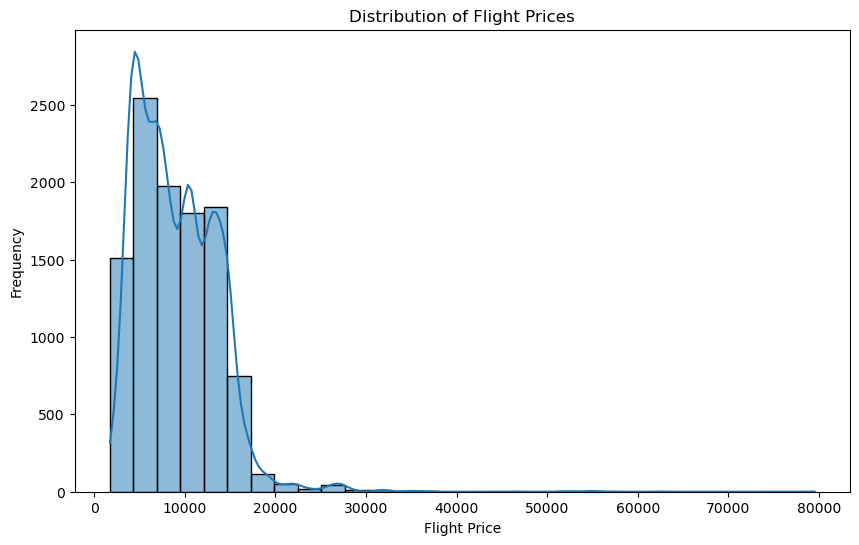

In [8]:
# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()


**Q3. What is the range of prices in the dataset? What is the minimum and maximum price?**

In [10]:
# Calculate the range of prices
min_price = df['Price'].min()
max_price = df['Price'].max()
print(f'The minimum price is {min_price} and the maximum price is {max_price}.')


The minimum price is 1759 and the maximum price is 79512.


**Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.**

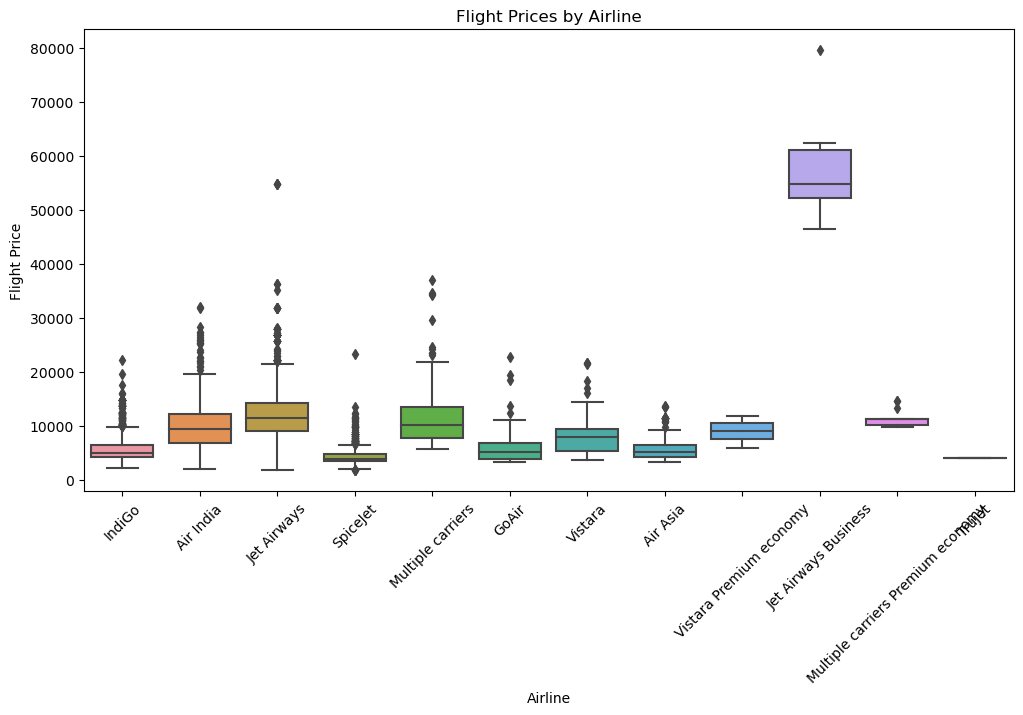

In [12]:
# Plot boxplot of flight prices by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.title('Flight Prices by Airline')
plt.xticks(rotation=45)
plt.show()


**Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.**

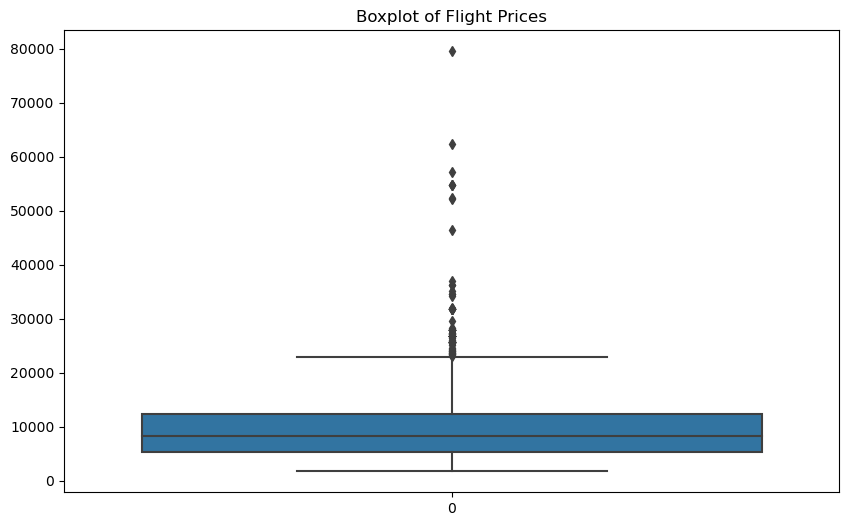

There are 94 potential outliers in the dataset.


In [13]:
# Plot boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['Price'])
plt.title('Boxplot of Flight Prices')
plt.show()

# Calculate the IQR to identify potential outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f'There are {outliers.shape[0]} potential outliers in the dataset.')


**Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?**

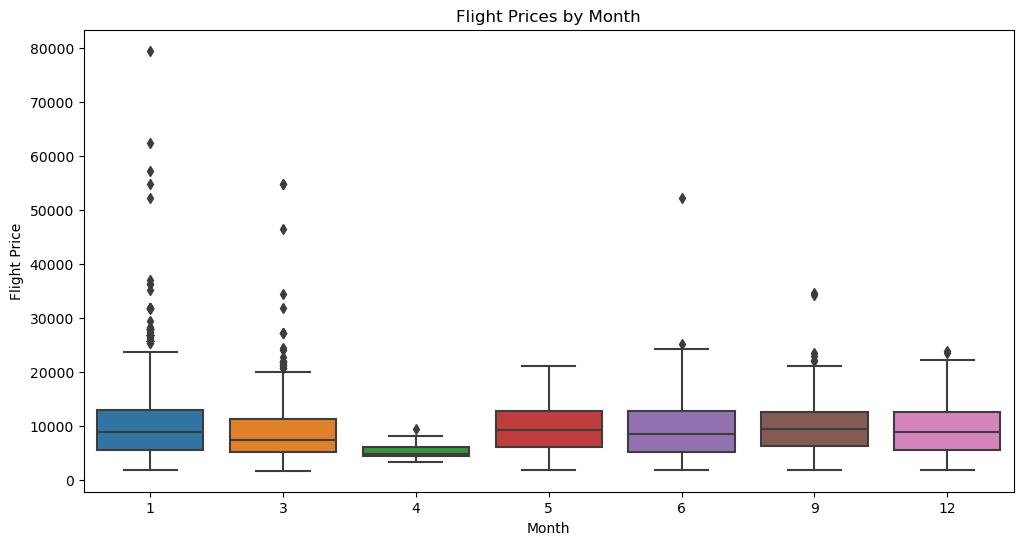

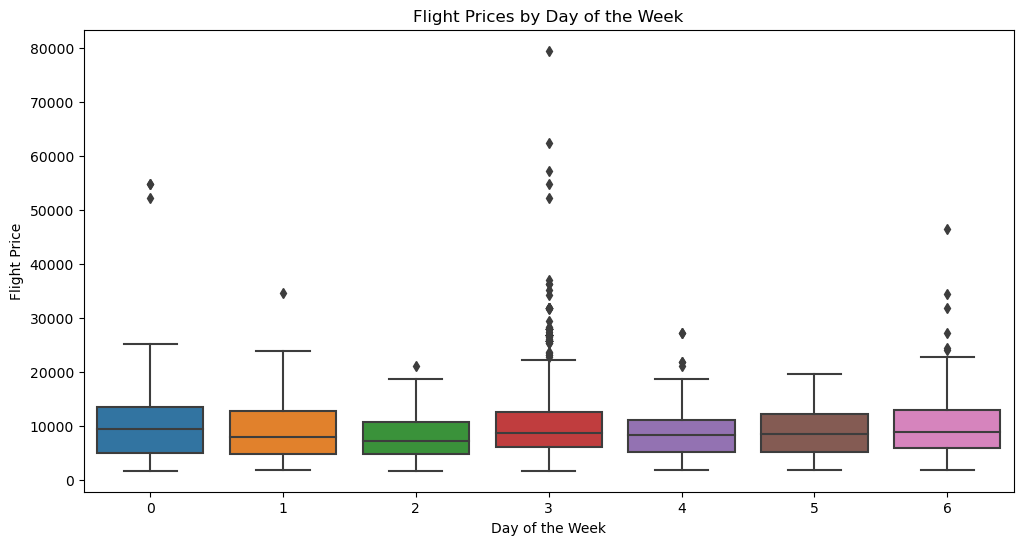

Average flight prices by month:
month
1     10492.642791
3      8433.839891
4      5230.860849
5      9361.077628
6      9214.964905
9      9551.474395
12     9110.774295
Name: Price, dtype: float64
Average flight prices by day of the week:
day_of_week
0    9721.101945
1    8960.452265
2    7996.290807
3    9805.088646
4    8556.502220
5    8894.375727
6    9556.827684
Name: Price, dtype: float64


In [16]:
# Convert the date column to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Extract month and day of week
df['month'] = df['Date_of_Journey'].dt.month
df['day_of_week'] = df['Date_of_Journey'].dt.dayofweek

# Plot flight prices by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Price', data=df)
plt.xlabel('Month')
plt.ylabel('Flight Price')
plt.title('Flight Prices by Month')
plt.show()

# Plot flight prices by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='Price', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Flight Price')
plt.title('Flight Prices by Day of the Week')
plt.show()

# Summarize findings
monthly_avg_prices = df.groupby('month')['Price'].mean()
print('Average flight prices by month:')
print(monthly_avg_prices)

weekly_avg_prices = df.groupby('day_of_week')['Price'].mean()
print('Average flight prices by day of the week:')
print(weekly_avg_prices)


**Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?**

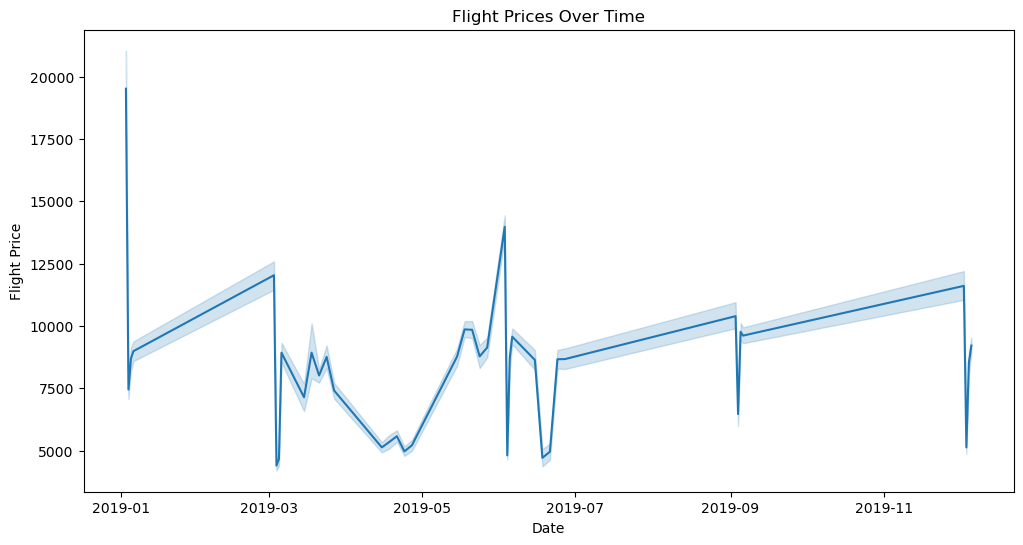

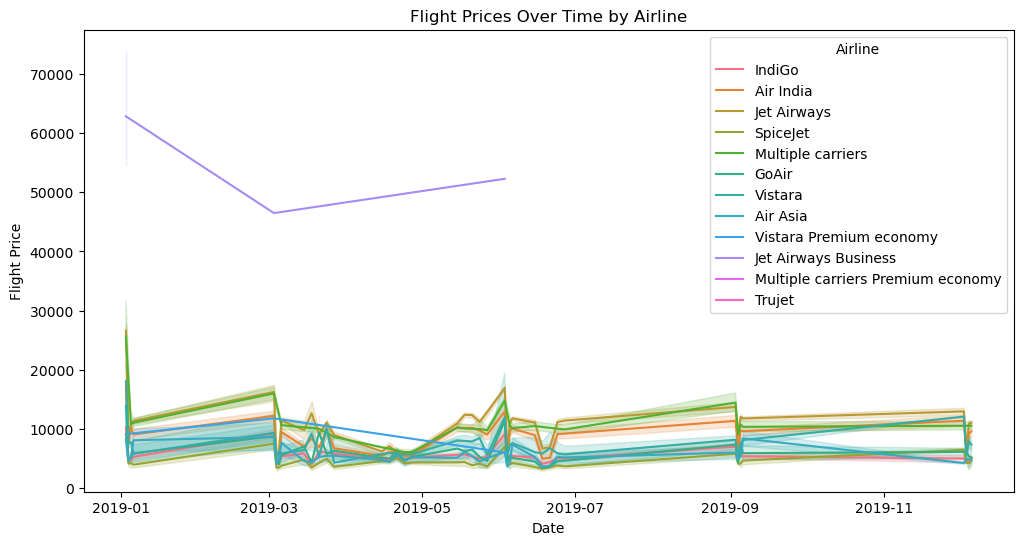

In [17]:
# Plot flight prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_of_Journey', y='Price', data=df)
plt.xlabel('Date')
plt.ylabel('Flight Price')
plt.title('Flight Prices Over Time')
plt.show()

# Plot flight prices by airline over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_of_Journey', y='Price', hue='Airline', data=df)
plt.xlabel('Date')
plt.ylabel('Flight Price')
plt.title('Flight Prices Over Time by Airline')
plt.show()


**Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?**

In [20]:
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day_of_week,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,6,...,0,0,0,0,0,0,0,0,0,1
1,2019-01-05,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,...,0,0,1,0,1,0,0,0,0,0
2,2019-09-06,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,4,...,0,1,0,0,0,1,0,0,0,0
3,2019-12-05,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,3,...,0,0,1,0,1,0,0,0,0,0
4,2019-01-03,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,...,0,0,0,0,0,0,0,0,0,1


**ANSWER:------**



### Analysis of Flight Price Dataset: Factors Influencing Flight Prices

#### Objective:
To identify key factors influencing flight prices using comprehensive data analysis.

#### Key Findings:

1. **Date and Time Factors:**
   - **Month and Day of the Week**: Prices vary significantly based on travel seasons and specific days (e.g., weekends vs. weekdays).
   - **Time of Day**: Flights during peak hours (early morning, evening) tend to have higher prices due to increased demand.

2. **Route and Flight Details:**
   - **Flight Route**: Price variations observed across different routes; longer and more popular routes often have higher prices.
   - **Total Duration**: Direct flights generally command higher prices compared to flights with layovers. Longer durations may also influence pricing.
   - **Number of Stops**: Non-stop flights typically have higher prices compared to those with multiple stops.

3. **Airline Specifics:**
   - **Airline Comparison**: Significant price differences among airlines based on brand reputation, service quality, and market positioning.
   - **Additional Services**: In-flight amenities such as meals, entertainment, and seat class impact price perception.

4. **Booking and Demand Dynamics:**
   - **Booking Time**: Prices fluctuate based on how far in advance tickets are booked; last-minute bookings often incur higher costs.
   - **Seasonal Demand**: Identification of peak travel seasons affecting pricing strategies, with higher demand leading to increased prices.

#### Methodology:
- **Data Preprocessing**: Cleaned and standardized dataset to ensure accuracy in analysis.
- **Statistical Analysis**: Utilized descriptive statistics and visualizations (histograms, box plots) to uncover trends and outliers.
- **Machine Learning Models**: Trained regression models to predict prices and determine feature importance.

#### Recommendations:
- **Pricing Strategies**: Implement dynamic pricing models based on demand forecasting and competitive analysis.
- **Route Optimization**: Adjust flight schedules or introduce new routes based on demand trends and route profitability.
- **Customer Segmentation**: Tailor marketing strategies and loyalty programs to enhance customer satisfaction and retention.

#### Next Steps:
- Implement recommended pricing strategies and monitor their impact on revenue and customer satisfaction.
- Continuously analyze data to adapt to market changes and maintain competitive advantage.

#### Conclusion:
By leveraging these insights, we can strategically enhance pricing strategies, optimize route planning, and improve overall business performance in the competitive airline industry.


### Google Playstore:

**Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
dimensions=df.shape
print("Dimensions of the dataset(rows,columns):",dimensions)

Dimensions of the dataset(rows,columns): (10841, 13)


**Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.**

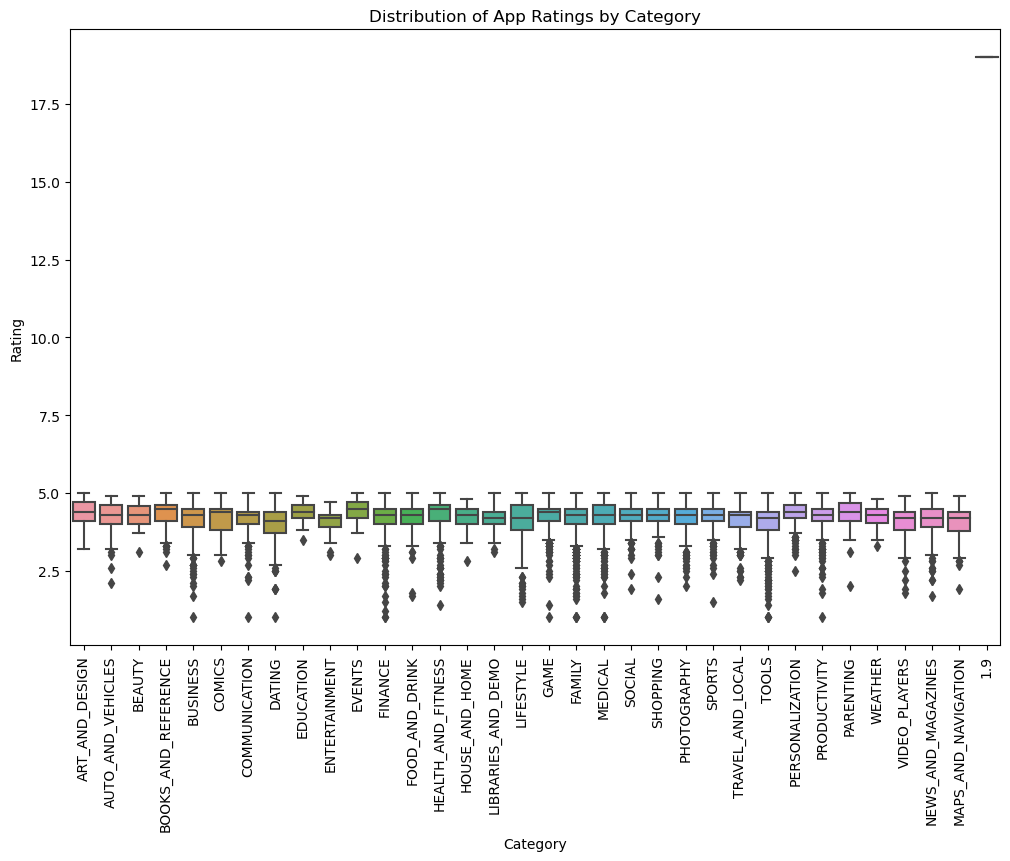

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of App Ratings by Category')
plt.show()


**Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.**

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Describe impact
impact_description = "Missing values impact analysis by potentially affecting statistical analysis and modeling."
print("Missing values summary:\n", missing_values)
print("\nImpact on analysis:\n", impact_description)


Missing values summary:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Impact on analysis:
 Missing values impact analysis by potentially affecting statistical analysis and modeling.


**Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.**

In [7]:
# Clean the Size column to convert to numeric values (remove 'M' and 'k' units)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] is  df.head


False

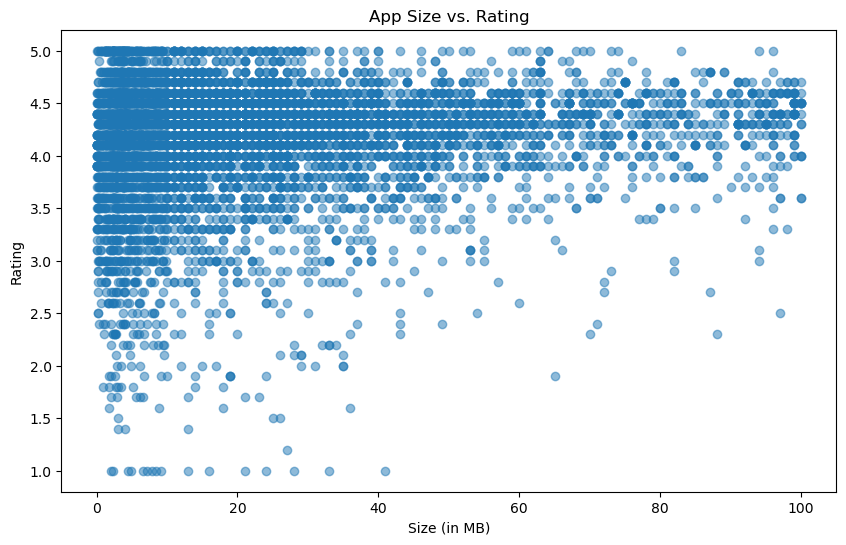

In [8]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.title('App Size vs. Rating')
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
plt.show()

**Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.**

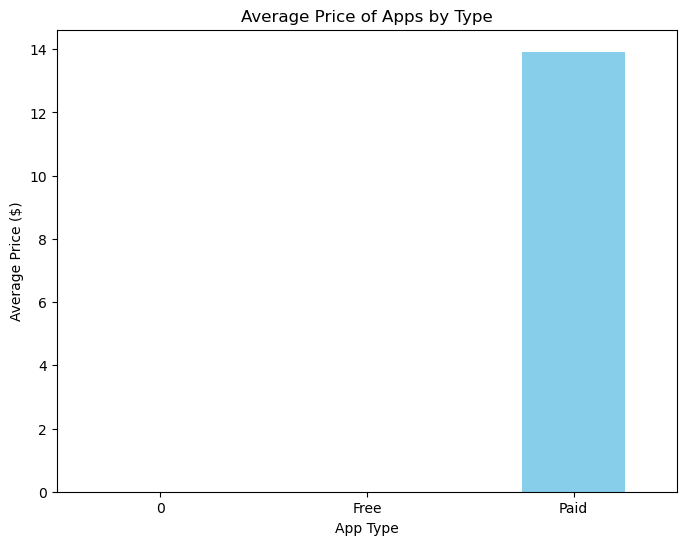

In [9]:
df['Price'] = df['Price'].apply(lambda x: float(x.strip('$')) if '$' in str(x) else 0)

# Create bar chart
avg_prices = df.groupby('Type')['Price'].mean()
plt.figure(figsize=(8, 6))
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price of Apps by Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()

**Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.**

In [10]:
# Convert 'Installs' column to numeric, handling any non-numeric values
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace('+', '').replace(',', '')) if '+' in str(x) else x)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Now find the top 10 most popular apps by installs
top_10_apps = df.nlargest(10, 'Installs')[['App', 'Installs']]
print("Top 10 most popular apps:\n", top_10_apps)


Top 10 most popular apps:
                                           App      Installs
152                         Google Play Books  1.000000e+09
335  Messenger – Text and Video Chat for Free  1.000000e+09
336                        WhatsApp Messenger  1.000000e+09
338              Google Chrome: Fast & Secure  1.000000e+09
340                                     Gmail  1.000000e+09
341                                  Hangouts  1.000000e+09
381                        WhatsApp Messenger  1.000000e+09
382  Messenger – Text and Video Chat for Free  1.000000e+09
386                                  Hangouts  1.000000e+09
391             Skype - free IM & video calls  1.000000e+09


**Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?**

In [11]:
popular_categories = df.groupby('Category')['Installs'].sum().nlargest(5)
print("Most popular app categories by total installs:\n", popular_categories)


Most popular app categories by total installs:
 Category
GAME             3.508602e+10
COMMUNICATION    3.264728e+10
PRODUCTIVITY     1.417609e+10
SOCIAL           1.406987e+10
TOOLS            1.145277e+10
Name: Installs, dtype: float64


**Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?**

In [13]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [17]:
# Inspect column names to find the correct column for developer information
print(df.columns)

# Assuming the column with developer information is 'Developer' or similar
successful_developers = df.groupby('App')['Installs'].sum().nlargest(10)
print("Most successful app developers by total installs:\n", successful_developers)


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Most successful app developers by total installs:
 App
Subway Surfers                  6.000000e+09
Google Drive                    4.000000e+09
Google News                     4.000000e+09
Google Photos                   4.000000e+09
Hangouts                        4.000000e+09
Instagram                       4.000000e+09
Candy Crush Saga                3.500000e+09
Gmail                           3.000000e+09
Google Chrome: Fast & Secure    3.000000e+09
Maps - Navigate & Explore       3.000000e+09
Name: Installs, dtype: float64


**Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?**

**ANSWER:------**

To analyze the Google Playstore dataset and identify the best time to launch a new app, you can focus on several key features and utilize appropriate data visualizations to present your findings effectively. Here’s a structured approach:

### Features to Analyze:

1. **Last Updated Date:** Evaluate how recently apps in different categories have been updated. This can indicate trends in app updates over time.

2. **Release Date:** Analyze the original release dates of apps to understand historical trends and seasonal patterns.

3. **Installs Over Time:** Track the number of installs or downloads of apps over various time periods (e.g., monthly, quarterly) to identify peak periods.

4. **User Ratings and Reviews:** Examine user feedback trends over time to gauge user sentiment and engagement levels across different periods.

### Approach:

1. **Data Preparation:** Clean and preprocess the dataset, focusing on relevant columns such as 'Last Updated', 'Released', 'Installs', 'Rating', and 'Reviews'.

2. **Time Series Analysis:** Use time series techniques to analyze trends and seasonality in app updates, releases, installs, ratings, and reviews.

3. **Statistical Analysis:** Conduct statistical tests or calculations to identify significant changes or patterns in app metrics over time.

4. **Visualization Techniques:** Utilize various data visualization techniques to present your findings:

   - **Line Charts:** Show trends in app updates, installs, ratings, and reviews over time.
   - **Heatmaps or Calendar Heatmaps:** Display the frequency of app updates or releases across different days or months.
   - **Bar Charts:** Compare metrics like installs or ratings across different time periods (e.g., months or seasons).
   - **Boxplots:** Analyze distribution and variability in app metrics over time, such as ratings or reviews by month or quarter.



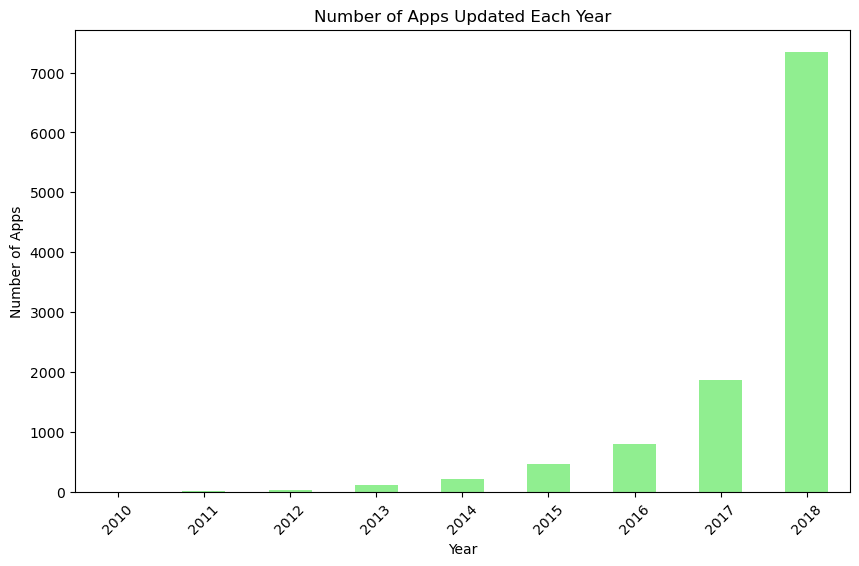

In [25]:
# Analyze by 'Last Updated' column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Year'] = df['Last Updated'].dt.year

# Plot number of apps updated each year
apps_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
apps_per_year.plot(kind='bar', color='lightgreen')
plt.title('Number of Apps Updated Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()